In [12]:
import pandas as pd

In [13]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Exploritery data analysis

In [14]:
df_ratings.rating.value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [15]:
#merging movies and ratings based on movieid,its common
movie_rating= pd.merge(df_movies,df_ratings,on='movieId')
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [16]:
#searching the count of reviews that come to each movie
movie_rating['title'].value_counts()[:20]

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [17]:
movie_rating.groupby('title')['rating'].agg(['mean','count']).sort_values(by='count',ascending=False)[:20]

,mean,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


NameError: name 'plt' is not defined

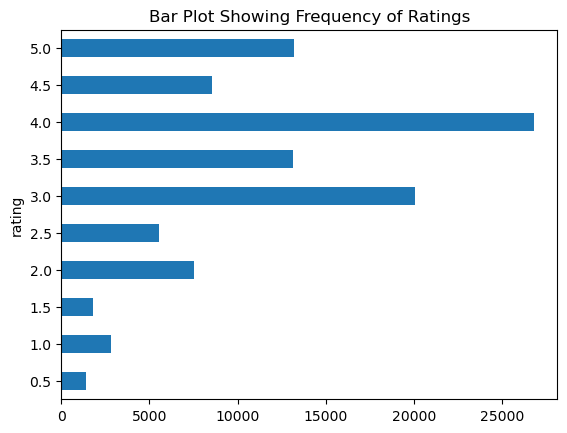

In [18]:
# Plot the frequency of ratings using a horizontal bar plot
movie_rating['rating'].value_counts().sort_index().plot(
    kind='barh', 
    title='Bar Plot Showing Frequency of Ratings'
)

# Set the y-axis label
plt.ylabel('Rating')

# Set the x-axis label (since it's horizontal, this is the frequency)
plt.xlabel('Frequency')

# Display the plot
plt.show()


##Data prepocessing

In [ ]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
col_drop=['title','genres','timestamp']
movie_rating_clean = movie_rating.drop(col_drop,axis=1,inplace=False)
movie_rating_clean.head()

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


In [19]:
movie_user_df = pd.pivot_table(movie_rating,values='rating',index='movieId',columns='userId',fill_value=0)
movie_user_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.neighbors import NearestNeighbors
nn_algo = NearestNeighbors(metric='cosine')
nn_algo.fit(movie_user_df)

NearestNeighbors(metric='cosine')

In [ ]:

def recommend_movie(movie_name, nos=5):
    movieId = df_movies.loc[df_movies['title'] == movie_name, 'movieId'].values[0]
    distance, neighbors = nn_algo.kneighbors([movie_user_df.loc[movieId]], n_neighbors=nos+1)
    movieids = [movie_user_df.iloc[i].name for i in neighbors[0]]
    movie_title_list = []
    for ids in movieids:
        movie_title = df_movies.loc[df_movies['movieId'] == ids, 'title'].item()
        movie_title_list.append(movie_title)
    print('\n'.join(movie_title_list))

recommendation engine core

In [ ]:
recommend_movie('Batman Forever (1995)',5)

Batman Forever (1995)
Batman (1989)
True Lies (1994)
Ace Ventura: Pet Detective (1994)
Cliffhanger (1993)
Dances with Wolves (1990)


getting actual title

In [ ]:
df_movies[df_movies['title'].str.lower().str.contains('batman')]

,movieId,title,genres
126,153,Batman Forever (1995),Action|Adventure|Comedy|Crime
509,592,Batman (1989),Action|Crime|Thriller
1060,1377,Batman Returns (1992),Action|Crime
1174,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller
2418,3213,Batman: Mask of the Phantasm (1993),Animation|Children
5463,26152,Batman (1966),Action|Adventure|Comedy
5620,27155,"Batman/Superman Movie, The (1998)",Action|Adventure|Animation|Children|Fantasy|Sc...
5631,27311,Batman Beyond: Return of the Joker (2000),Action|Animation|Crime|Sci-Fi|Thriller
5917,33794,Batman Begins (2005),Action|Crime|IMAX
6815,60979,Batman: Gotham Knight (2008),Action|Animation|Crime


In [21]:
import os

# Ensure 'models/' directory exists before saving files
os.makedirs("models", exist_ok=True)

import pickle

# Save Collaborative Filtering model
with open("models/collab_model.pkl", "wb") as file:
    pickle.dump(nn_algo, file)

# Save movie-user matrix for predictions
with open("models/movie_user_matrix.pkl", "wb") as file:
    pickle.dump(movie_user_df, file)


userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    0.0
607    0.0
608    0.0
609    0.0
610    0.0
Name: 34129, Length: 610, dtype: float64